# House project

In [1]:
# Import labriaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# head

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
# head

test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


checking the dimension

In [5]:
train.shape

(1168, 81)

In [6]:
test.shape

(292, 80)

In [7]:
# merge the data with train and test in df
df = pd.concat((train,test))

In [8]:
df.shape

(1460, 81)

In [9]:
# information of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 291
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallCo

# checking the datatypes of the columns.


In [10]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice        float64
dtype: object

In [11]:
df2 = df.select_dtypes(include=['object'])
df2

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,RFn,TA,TA,Y,NaN,MnPrv,NaN,COD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
288,RL,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
289,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,Shed,WD,Normal
290,RM,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# summary staticstics

In [12]:
df_numeric.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1168.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,181477.005993
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Checking the Correlation between the variables¶



In [13]:
df_numeric.cor = df_numeric.corr()
df_numeric.cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.023897
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.060775
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.341294
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.249499
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.789185
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.065642
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.514408
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507831
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.466386
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.362874


<AxesSubplot:>

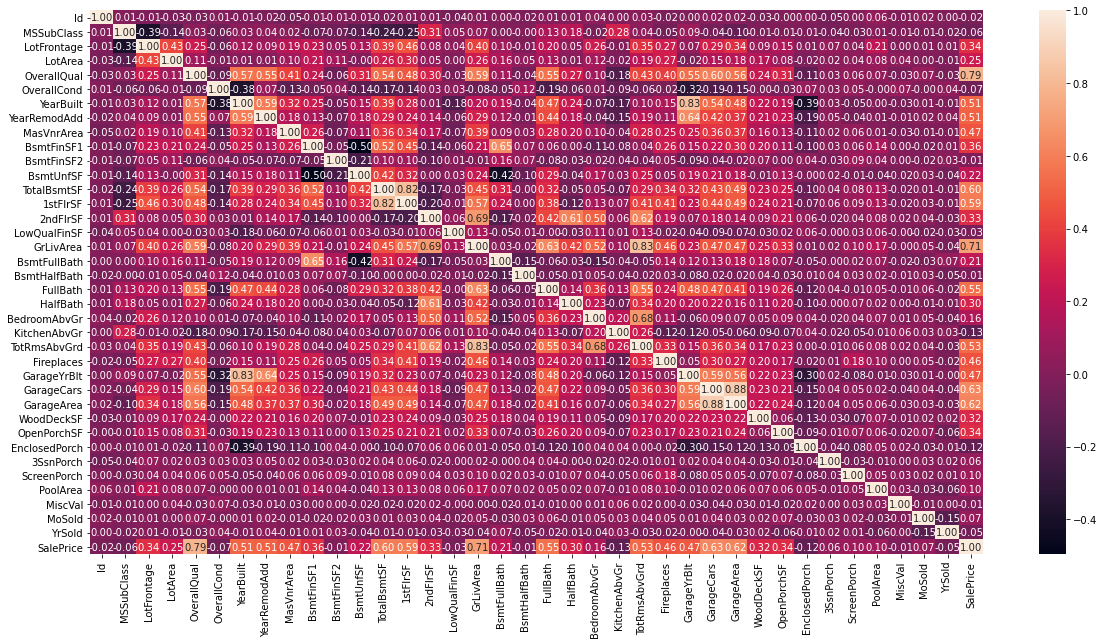

In [14]:

plt.figure(figsize=(20,10))
sns.heatmap(df_numeric.cor, annot=True , fmt='.2f')

cheching null values in the dataframe

In [15]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice        292
Length: 81, dtype: int64

<AxesSubplot:>

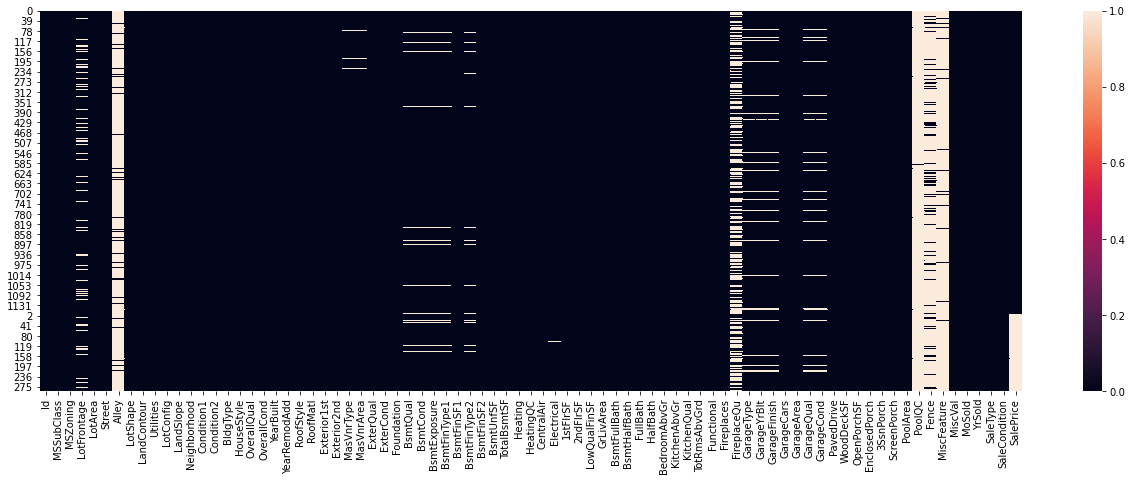

In [16]:
plt.figure(figsize = (22,7))
sns.heatmap(df.isnull())

In [17]:
null_percent = df.isnull().sum()/ df.shape[0]*100
null_percent

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice        20.000000
Length: 81, dtype: float64

more than 20% null values to drop

In [18]:
col_for_drop  = null_percent[null_percent>20].keys


In [19]:
col_for_drop

<bound method Series.keys of Alley          93.767123
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64>

In [20]:
df = df.drop(['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'] ,axis =1)

In [21]:
df.shape

(1460, 75)

In [22]:
df.isnull().sum().sum()

1160

# Filling the null values

In [23]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].mean())

In [24]:
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['BsmtFinType2'] =df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] =df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['MasVnrType'] =df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] =df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

# OrdinalEncoder

In [25]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == "object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [26]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

# Data Visualization

<AxesSubplot:>

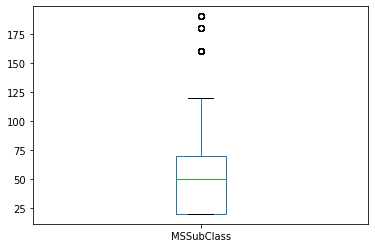

In [27]:
df['MSSubClass'].plot.box()

<AxesSubplot:>

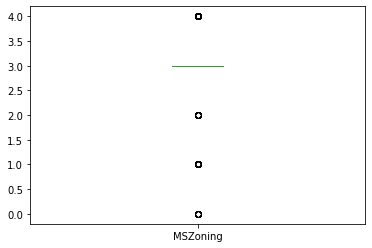

In [28]:
df['MSZoning'].plot.box()

<AxesSubplot:>

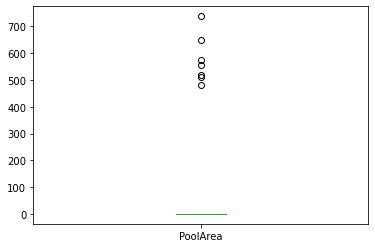

In [29]:
df['PoolArea'].plot.box()

<AxesSubplot:>

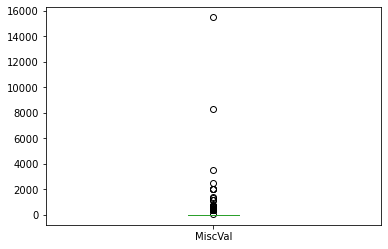

In [30]:
df['MiscVal'].plot.box()

<AxesSubplot:>

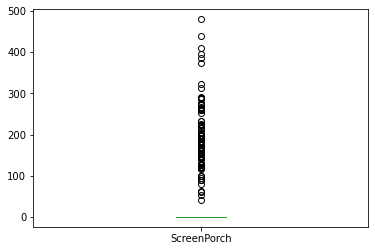

In [31]:
df['ScreenPorch'].plot.box()

<AxesSubplot:>

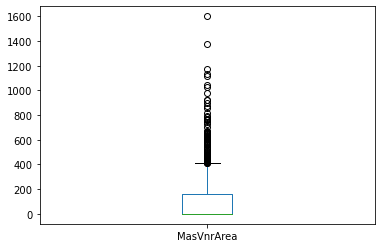

In [32]:
df['MasVnrArea'].plot.box()

<AxesSubplot:>

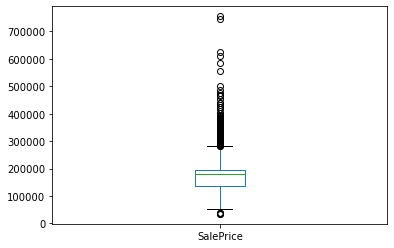

In [33]:
df['SalePrice'].plot.box()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


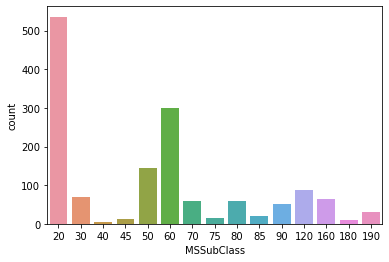

In [34]:
sns.countplot(x = 'MSSubClass', data=df)
print(df['MSSubClass'].value_counts())

3.0    1151
4.0     218
1.0      65
2.0      16
0.0      10
Name: MSZoning, dtype: int64


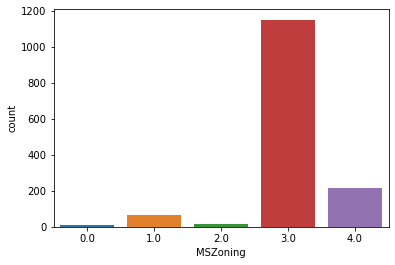

In [35]:
sns.countplot(x = 'MSZoning', data=df)
print(df['MSZoning'].value_counts())

1.0    1454
0.0       6
Name: Street, dtype: int64


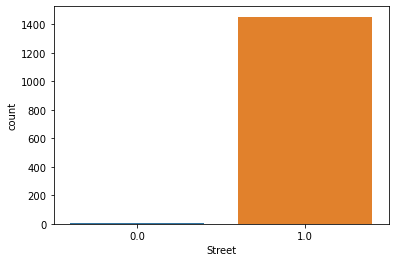

In [36]:
sns.countplot(x = 'Street', data=df)
print(df['Street'].value_counts())

3.0    925
0.0    484
1.0     41
2.0     10
Name: LotShape, dtype: int64


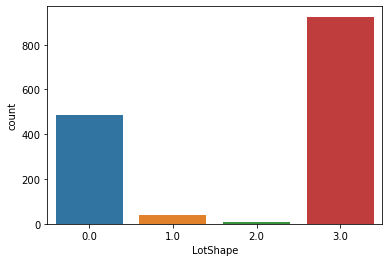

In [37]:
sns.countplot(x = 'LotShape', data=df)
print(df['LotShape'].value_counts())

3.0    1311
0.0      63
1.0      50
2.0      36
Name: LandContour, dtype: int64


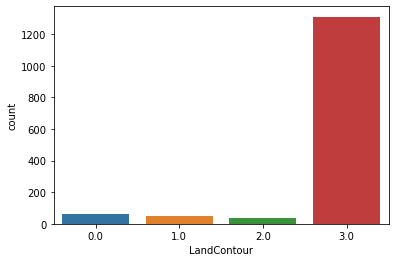

In [38]:
sns.countplot(x = 'LandContour', data=df)
print(df['LandContour'].value_counts())

0.0    1459
1.0       1
Name: Utilities, dtype: int64


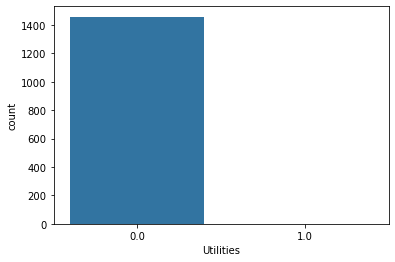

In [39]:
sns.countplot(x = 'Utilities', data=df)
print(df[ 'Utilities'].value_counts())

4.0    1052
0.0     263
1.0      94
2.0      47
3.0       4
Name: LotConfig, dtype: int64


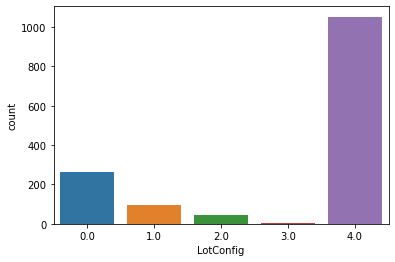

In [40]:
sns.countplot(x = 'LotConfig', data=df)
print(df['LotConfig'].value_counts())

0.0    1382
1.0      65
2.0      13
Name: LandSlope, dtype: int64


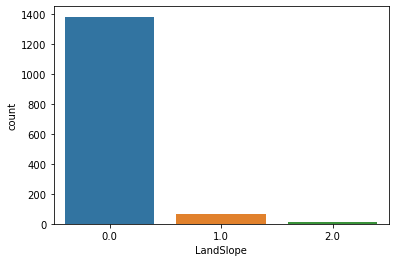

In [41]:
sns.countplot(x = 'LandSlope', data=df)
print(df['LandSlope'].value_counts())

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

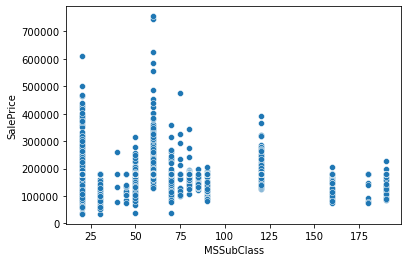

In [42]:
sns.scatterplot(x='MSSubClass',y='SalePrice',data=df)


# Remove the outlier

In [43]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([   1,    1,    1, ..., 1454, 1456, 1459], dtype=int64),
 array([ 9, 20, 34, ..., 66, 46, 29], dtype=int64))

In [44]:
df = df[(z<3).all(axis=1)]
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3.0,70.049958,4928,1.0,0.0,3.0,0.0,4.0,0.0,...,0,0,0,0,0,2,2007,8.0,4.0,128000.000000
2,60,3.0,92.000000,9920,1.0,0.0,3.0,0.0,1.0,0.0,...,0,0,0,0,0,6,2007,8.0,4.0,269790.000000
5,60,3.0,58.000000,14054,1.0,0.0,3.0,0.0,4.0,0.0,...,0,0,0,0,0,11,2006,6.0,5.0,219210.000000
6,20,3.0,70.049958,11341,1.0,0.0,3.0,0.0,4.0,0.0,...,0,0,95,0,0,5,2010,8.0,4.0,121500.000000
11,60,3.0,44.000000,9548,1.0,0.0,3.0,0.0,1.0,0.0,...,0,0,0,0,0,1,2010,8.0,4.0,237000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,20,3.0,93.000000,12085,1.0,3.0,3.0,0.0,4.0,0.0,...,0,0,0,0,0,11,2007,6.0,5.0,181477.005993
285,20,3.0,69.000000,7599,1.0,3.0,3.0,0.0,0.0,0.0,...,0,0,0,0,0,6,2007,8.0,4.0,181477.005993
287,20,3.0,78.000000,10206,1.0,3.0,3.0,0.0,4.0,0.0,...,0,0,0,0,0,10,2008,8.0,4.0,181477.005993
289,20,3.0,70.049958,11241,1.0,0.0,3.0,0.0,1.0,0.0,...,0,0,0,0,700,3,2010,8.0,4.0,181477.005993


# model building

In [45]:
x = df.drop('SalePrice',axis=1)
y =df['SalePrice']

# Remove the skewness

In [46]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

x = pd.DataFrame(x_new,columns=x.columns)

In [47]:
x.skew()

MSSubClass       0.111933
MSZoning        -1.088506
LotFrontage      0.120068
LotArea          0.128211
Street           0.000000
                   ...   
MiscVal          6.149099
MoSold          -0.033498
YrSold           0.000000
SaleType        -2.553590
SaleCondition   -0.299675
Length: 74, dtype: float64

# split into train and test

In [48]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=45)

# LinearRegression

In [49]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("Predicted results price:",pred)
print("actual price ",y_test)

Predicted results price: [169976.42301824 216518.77466382 211913.87825888 285271.91690808
 185214.45204286 202289.00630423 107250.3789903  267703.14203126
 185752.05125186 124225.83394133 159918.66146234 180239.93231091
 222670.70565594 213338.22729014 139731.22831608  85330.10281249
 235699.46112569 127759.73320201 164618.38625131 221564.87769024
 199596.69255011 209753.45458777 186550.54935987 242507.56341044
 121706.08460892 103268.03862363 211465.55222442 186011.11736222
 212065.50827588 162696.8592167  143766.07074204 171168.87516496
 207549.92030304 167180.53202857 146044.93266409 162552.08367452
 228553.47799268 210337.59662289 187424.24072443 191521.036312
 164187.71490751 232384.0849299  126337.97521453 225237.74519958
 108493.65807539  86520.42974301 145217.9637845  142938.07421116
 213874.21697925 123311.62833299 151455.7836697  229579.17935862
 210752.08371861 115969.57981274 132893.50614806 263969.49839944
 196944.157996   149011.09589798 146410.81995098 192547.8406602
 21

In [50]:
print('error:')

print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error :',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 25717.7923655345
Mean squared error : 1180164247.899176
Root Mean Squared Error: 34353.51871205009


In [51]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.6386987664710051


# Regularization:

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [53]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001,.001,.01,1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [54]:
# final model training
ls = Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls_score_training = ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)
ls_score_training*100

73.3738224798628

In [55]:
lss = r2_score(y_test,pred_ls)
lss*100

63.85338646478357

In [56]:
cv_score = cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

-6.237290042245127e+31

 # Ensemble technique:

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'],'max_features':["auto",'sqrt',"log2"]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)


{'criterion': 'mae', 'max_features': 'sqrt'}


In [58]:
rf = RandomForestRegressor(criterion='mae',max_features="auto")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score',rfc*100)

R2 Score 64.28627613891126
Cross Val Score -5.461626372189288e+31


# save the model

In [59]:
import pickle 
filename = ('house predict')
pickle.dump(rf, open(filename, 'wb'))

# Conclusion

In [60]:
loaded_model = pickle.load(open('house predict','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

64.28627613891126


In [61]:
conclusion =  pd.DataFrame([loaded_model.predict(x_test)[:]],index=["Predict","Orginal"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,182
Predict,162871.171139,208274.410959,216854.230899,274737.141079,155609.550899,191479.491259,130805.920959,256750.020899,160897.941318,148354.751498,...,180132.362877,258598.861079,151269.700599,293391.220599,237421.550899,193252.560779,155974.420959,137320.22036,185435.302098,245455.500959
Orginal,162871.171139,208274.410959,216854.230899,274737.141079,155609.550899,191479.491259,130805.920959,256750.020899,160897.941318,148354.751498,...,180132.362877,258598.861079,151269.700599,293391.220599,237421.550899,193252.560779,155974.420959,137320.22036,185435.302098,245455.500959
